# Multiple Linear Regression

## Bike Sharing Dataset

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



The company wants to know:
    
- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
day=pd.read_csv(r"C:\Users\91734\Downloads\day.csv")

#Head of the data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking size of the data
day.shape

(730, 16)

In [5]:
#CHECKING DATA TYPE
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### CHECKING NULL VALUES % IN THE DATAFRAME

In [6]:
day.isnull().sum()*100/len(day)    

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Dropping Variables that are not necessary for building model

In [7]:
day.drop(['instant'], axis = 1, inplace = True)
day.drop(['casual'], axis = 1, inplace = True)
day.drop(['registered'], axis = 1, inplace = True)
day.drop(['dteday'], axis = 1, inplace = True)

In [8]:
#checking data shape after dropping unecessary variables
day.shape

(730, 12)

# Step:2 Data Preparing

####  Creating Labels for the mnth , weekday , season ,weathersit

In [9]:
#mnth_Labels

day['mnth_Labels']=pd.cut(x= day['mnth'] , bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December'])

In [10]:
#weekday_Labels

day['weekday_Labels']=pd.cut(x= day['weekday'] , bins=[0,1,2,3,4,5,6,7,], labels=['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])

In [11]:
#Season_Labels

day['season_Labels']=pd.cut(x= day['season'] , bins=[0,1,2,3,4], labels=['spring', 'summer', 'fall', 'winter'])

In [12]:
#weathersit_Labels

day['weathersit_Labels']=pd.cut(x= day['weathersit'] , bins=[0,1,2,3,4], labels=['Partly cloudy', 'Mist Cloudy', 'Light Rain', ' Heavy Rain'])


# HANDLING CATEGORICAL VARIABLES

## Creating Dummy Variables

The variable `mnth , weekday , season ,weathersit` has  levels. We need to convert these levels into integer as well. 

For this, we are use something called `dummy variables`.

In [13]:
# Creating Dummy Variables for mnth
mnth_status = pd.get_dummies(day['mnth_Labels'],drop_first=True)

# Checking what the dataset 'mnth_status' looks like
mnth_status.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Creating Dummy Variables for weekday
weekday_status = pd.get_dummies(day['weekday_Labels'])

# Checking what the dataset 'weekday_status' looks like
weekday_status.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0


In [15]:
# Creating Dummy Variables for season
season_status = pd.get_dummies(day['season_Labels'],drop_first=True)

# Checking what the dataset 'season_status' looks like
season_status.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [16]:
# Creating Dummy Variables for weathersit
weathersit_status=pd.get_dummies(day['weathersit_Labels'] ,drop_first=True)

# Checking what the dataset 'weathersit_status' looks like
weathersit_status.head(30)

,Mist Cloudy,Light Rain,Heavy Rain
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,1,0,0
7,1,0,0
8,0,0,0
9,0,0,0


Now, we don't need four columns. WE can drop the Partly cloudy , as the type of weathersit can be identified with just the last two columns where —


100 will correspond to Mist cloudy

010 will correspond to Light Rain

000 will correspond to Heavy Rain

In [17]:
#Dropping mnth,weekday,season , weathersit as we have created creted labels for them

day.drop(['mnth'], axis = 1, inplace = True)
day.drop(['weekday'], axis = 1, inplace = True)
day.drop(['season'], axis = 1, inplace = True)
day.drop(['weathersit'], axis = 1, inplace = True)


### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

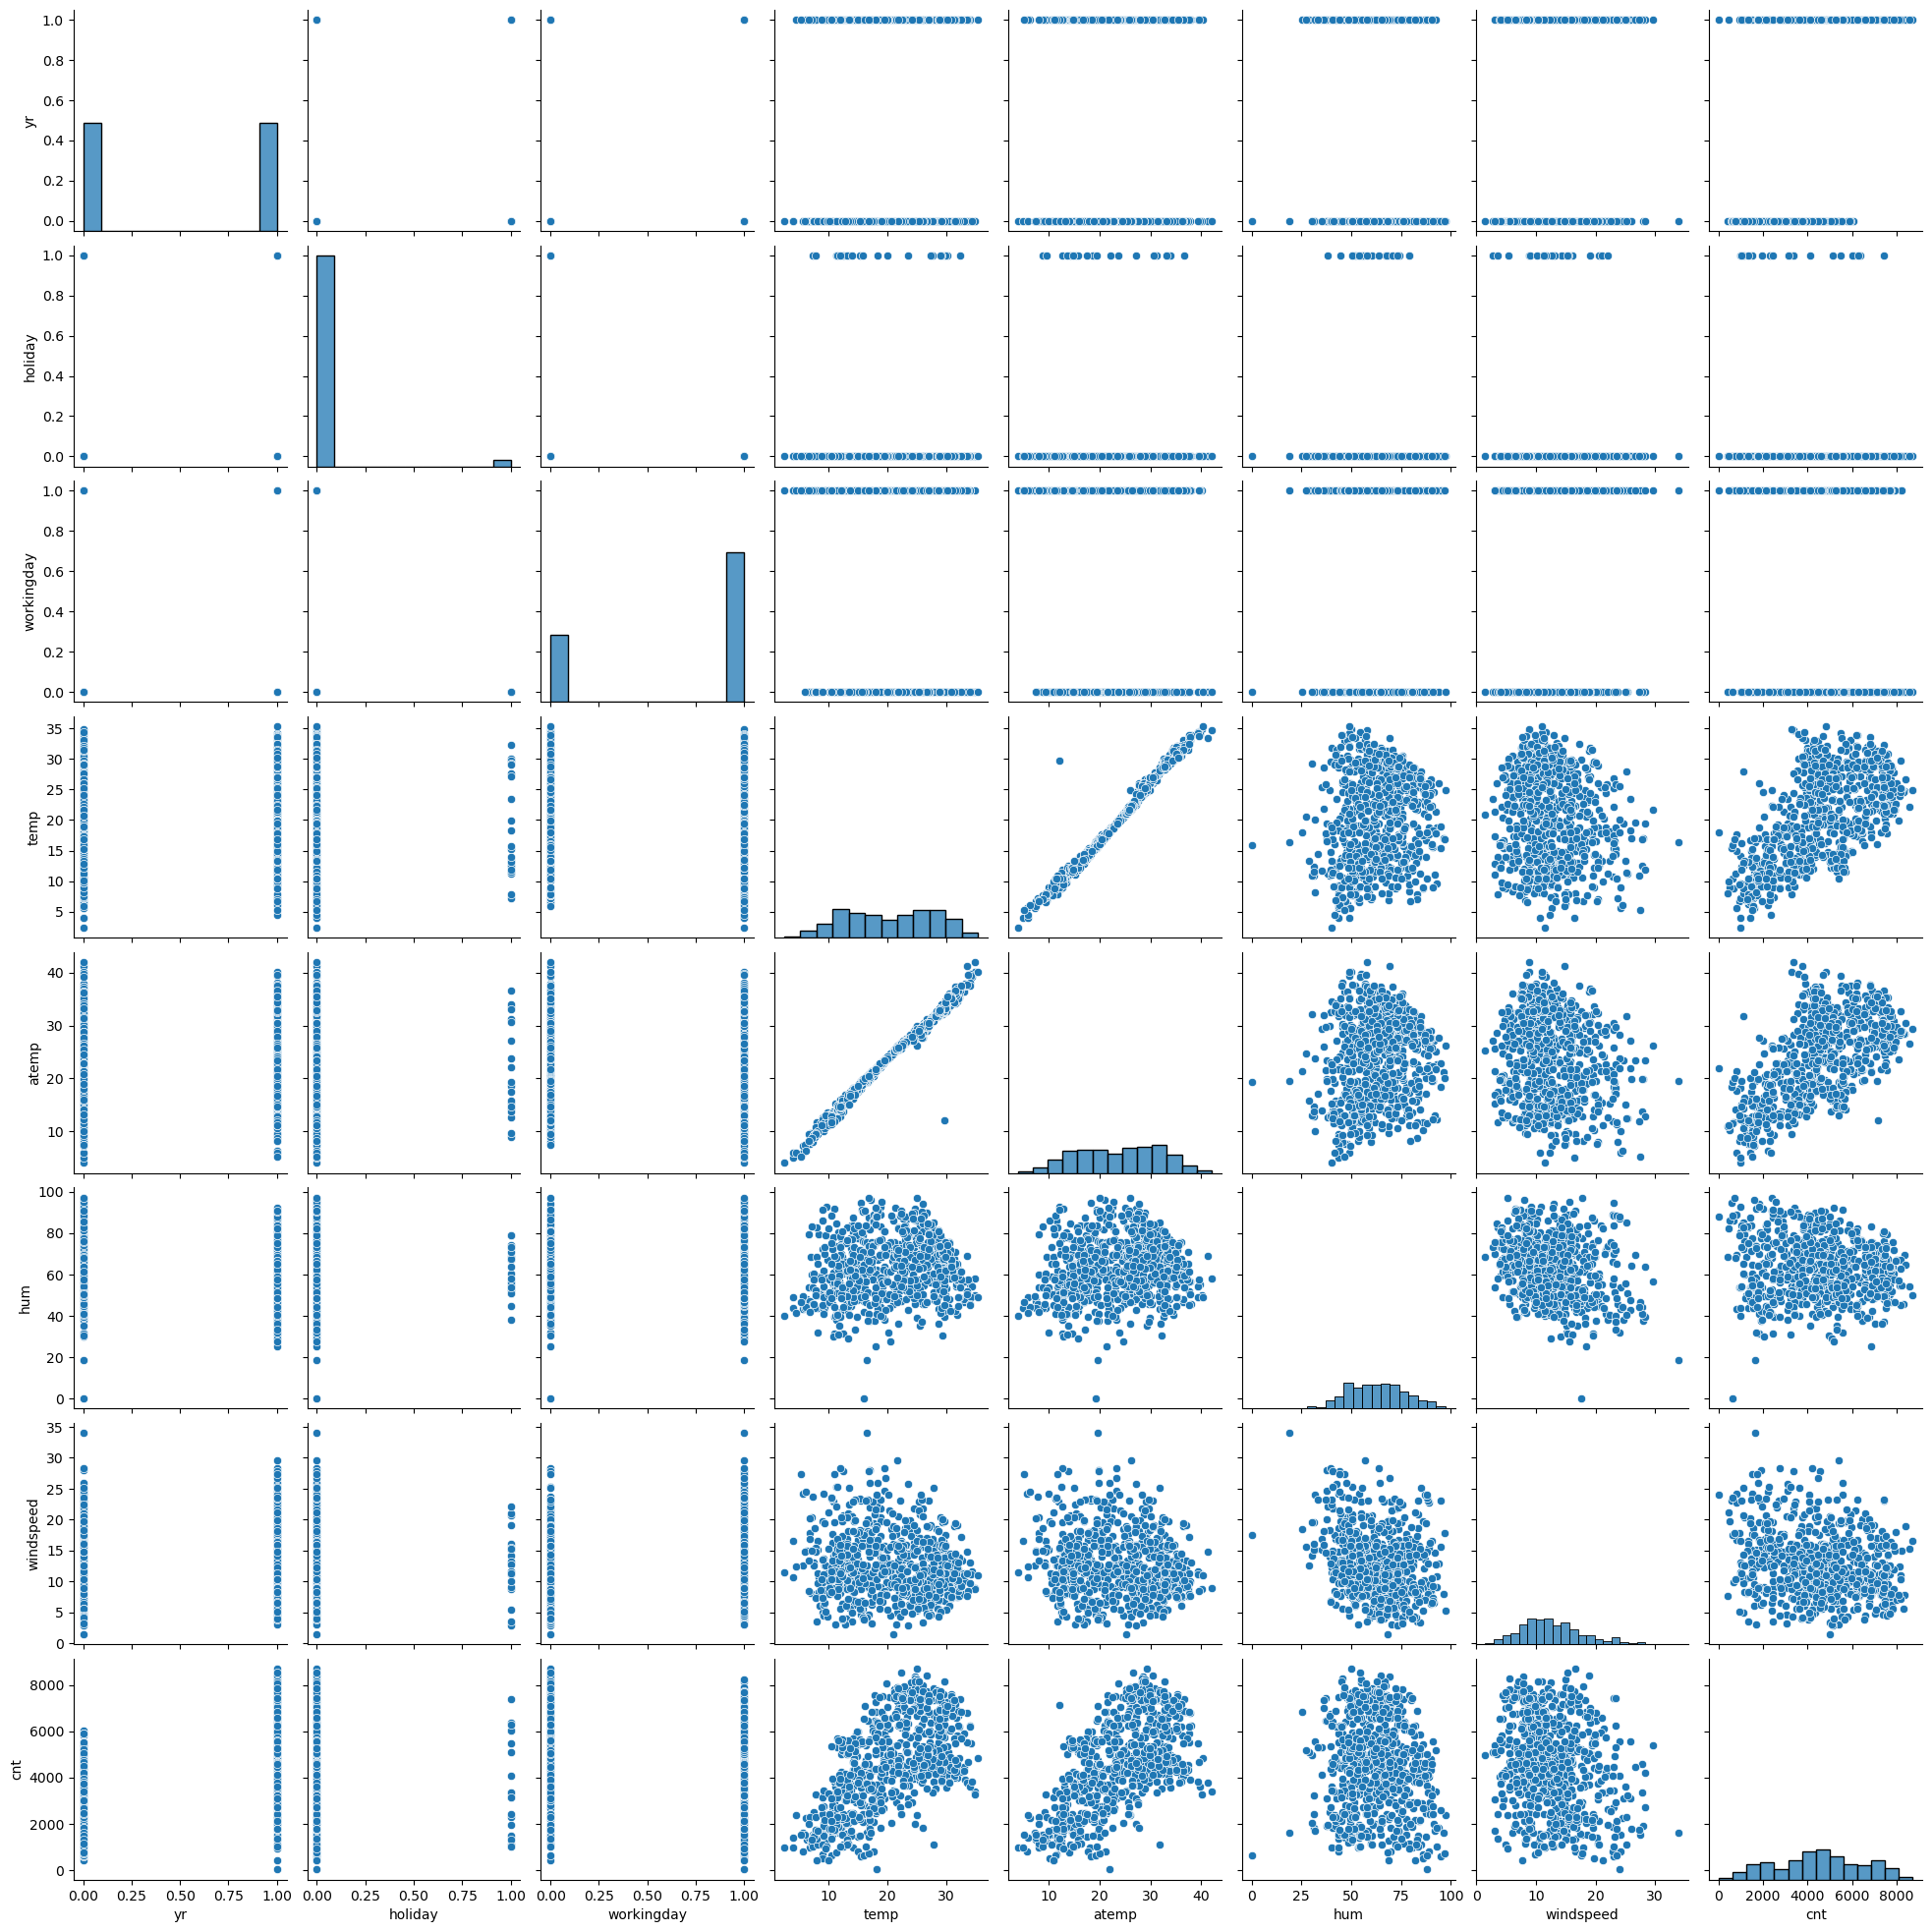

In [18]:
sns.pairplot(day)
plt.show()

In [19]:
# Adding  results to the original day dataframe

day = pd.concat([day, mnth_status], axis = 1)
day = pd.concat([day, weekday_status], axis = 1)
day = pd.concat([day, season_status], axis = 1)
day = pd.concat([day, weathersit_status], axis = 1)

# Step:3 Visualising the Data

##### Using Categorical Variables


In [20]:
#setting background colours for figures

sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

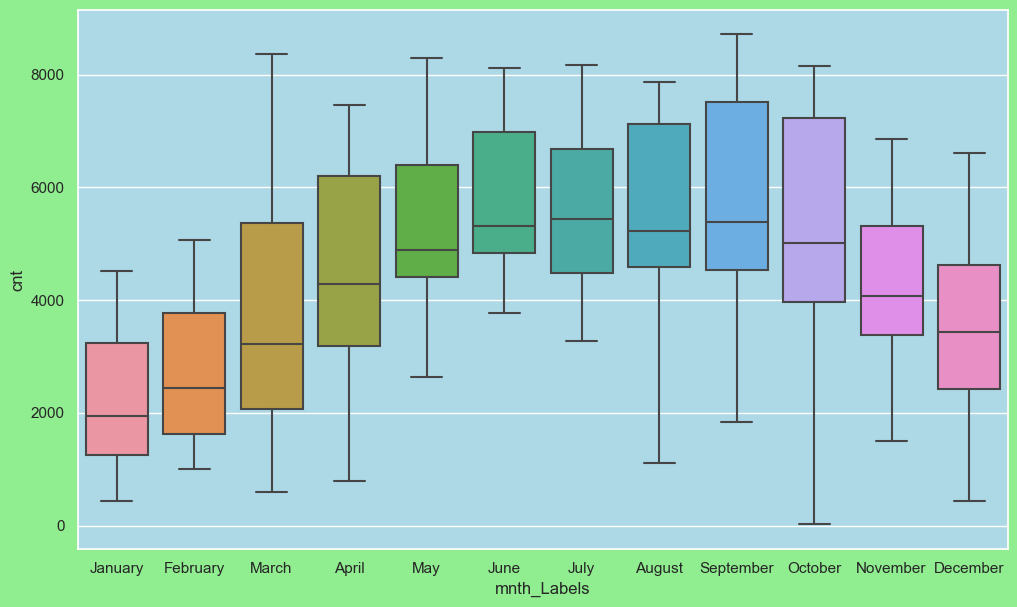

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'mnth_Labels', y = 'cnt', data = day)
plt.show()


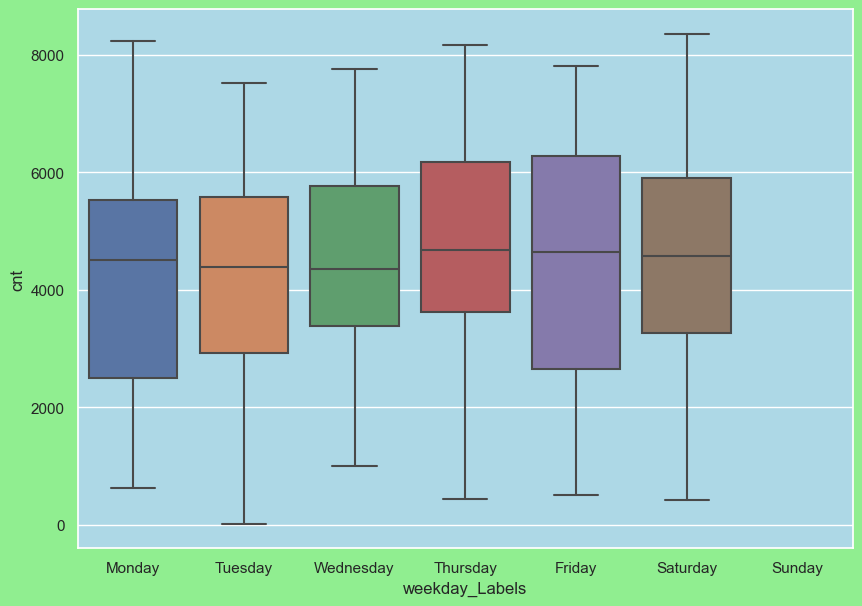

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'weekday_Labels', y = 'cnt', data = day)
plt.show()

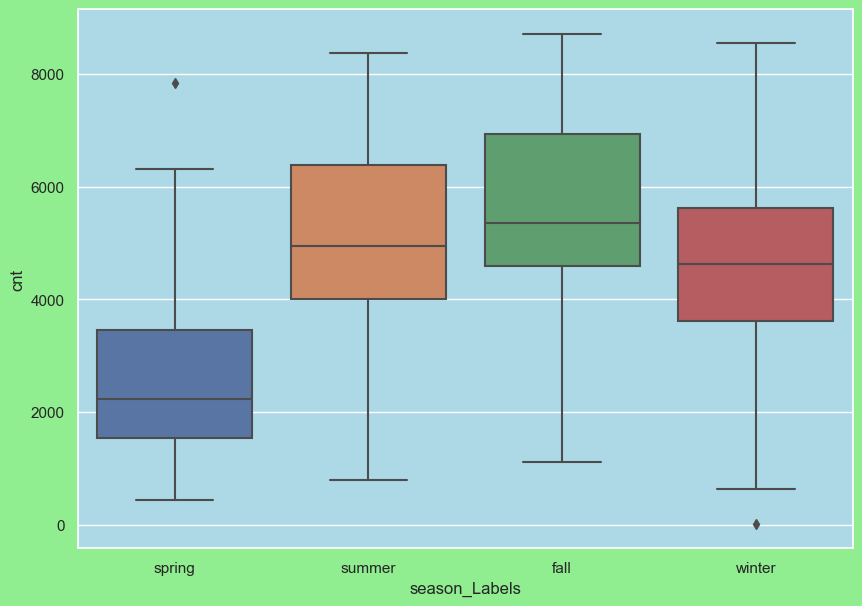

In [23]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'season_Labels', y = 'cnt', data = day)
plt.show()

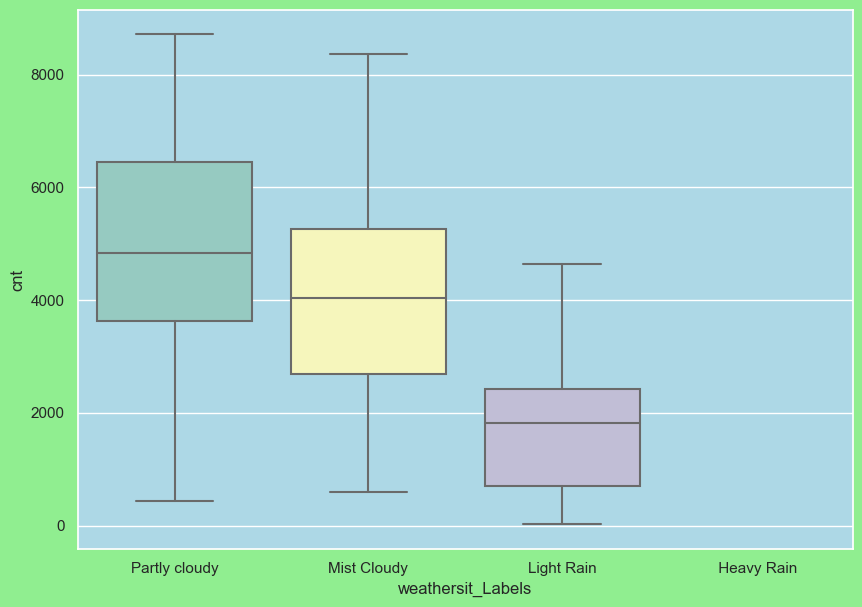

In [24]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'weathersit_Labels', y = 'cnt', data = day,  palette = "Set3")
plt.show()

In [25]:
# Dropping 'mnth_Labels','weekday_Labels' ,'season_Labels','weathersit_Labels' as we have created the dummies for it

day.drop(['mnth_Labels'], axis = 1, inplace = True)
day.drop(['weekday_Labels'], axis = 1, inplace = True)
day.drop(['season_Labels'], axis = 1, inplace = True)
day.drop(['weathersit_Labels'], axis = 1, inplace = True)

# Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
#checking shape of the data after splitting 

print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


##  Step 5: Rescaling the Features 

In [28]:
#Importing estimator for scalling from sklearn

from sklearn.preprocessing import MinMaxScaler

In [29]:
#Using MinMaxScaler for scalling dataas it brings all the data in the range of 0-1
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
#Head of the train_data

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,February,March,...,Thursday,Friday,Saturday,Sunday,summer,fall,winter,Mist Cloudy,Light Rain,Heavy Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,1,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [32]:
y = df_train.pop('cnt')        #Dependent Variable
X= df_train                    #Independent Variable

# Step:6  Model Building 

###  Using RFE Method

Recursive feature elimination

In [33]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [35]:
# Running RFE with the output number of the variable equal to 15

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X, y)

In [36]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('February', False, 11),
 ('March', True, 1),
 ('April', False, 2),
 ('May', True, 1),
 ('June', False, 3),
 ('July', False, 12),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 13),
 ('December', False, 14),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 8),
 ('Thursday', False, 6),
 ('Friday', False, 7),
 ('Saturday', False, 15),
 ('Sunday', False, 16),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mist Cloudy', True, 1),
 ('Light Rain', True, 1),
 (' Heavy Rain', False, 17)]

In [37]:
#Creating variable for RFE selected variables
col = X.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'March', 'May', 'August',
       'September', 'October', 'summer', 'fall', 'winter', 'Mist Cloudy',
       'Light Rain'],
      dtype='object')

In [38]:
#list of non-support rfe
X.columns[~rfe.support_]

Index(['workingday', 'atemp', 'February', 'April', 'June', 'July', 'November',
       'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', ' Heavy Rain'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X[col]

In [40]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y ,X_train_rfe).fit()   # Running the linear model

In [42]:
lm.params

const          0.237574
yr             0.230385
holiday       -0.089060
temp           0.484667
hum           -0.178353
windspeed     -0.183595
March          0.033322
May            0.030660
August         0.051139
September      0.120896
October        0.043662
summer         0.115215
fall           0.043588
winter         0.153434
Mist Cloudy   -0.055804
Light Rain    -0.244542
dtype: float64

In [43]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.95e-189
Time:                        12:49:25   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2376      0.027      8.689      0.000       0.184       0.291
yr              0.2304      0.008     28.506      0.000       0.215       0.246
holiday        -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp            0.4847      0.034     14.073      0.000       0.417       0.552
hum            -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed      -0.1836      0.026     -7.164      0.000      -0.234      -0.133
March           0.0333      0.015      2.269      0.024       0.004       0.062
May             0.0307      0.018      1.717      0.087      -0.004       0.066
August          0.0511      0.017      2.931      0.004       0.017       0.085
September       0.1209      0.017      7.009      0.000       0.087       0.155
October         0.0437      0.017      2.504      0.013       0.009       0.078
summer          0.1152      0.015      7.440      0.000       0.085       0.146
fall            0.0436      0.023      1.898      0.058      -0.002       0.089
winter          0.1534      0.014     10.852      0.000       0.126       0.181
Mist Cloudy    -0.0558      0.010     -5.340      0.000      -0.076      -0.035
Light Rain     -0.2445      0.026     -9.265      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Keypoints: `May` is insignificant(high p-value) in presence of other variables; can be dropped

In [44]:
X_train_new = X_train_rfe.drop(["May"], axis = 1)


### Rebuilding the model without `May`

In [45]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [46]:
lm = sm.OLS(y , X_train_lm).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          9.02e-190
Time:                        12:49:25   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2321      0.027      8.530      0.000       0.179       0.286
yr              0.2297      0.008     28.400      0.000       0.214       0.246
holiday        -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp            0.4952      0.034     14.582      0.000       0.428       0.562
hum            -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed      -0.1857      0.026     -7.241      0.000      -0.236      -0.135
March           0.0285      0.014      1.975      0.049       0.000       0.057
August          0.0506      0.017      2.897      0.004       0.016       0.085
September       0.1204      0.017      6.966      0.000       0.086       0.154
October         0.0421      0.017      2.414      0.016       0.008       0.076
summer          0.1217      0.015      8.090      0.000       0.092       0.151
fall            0.0366      0.023      1.618      0.106      -0.008       0.081
winter          0.1504      0.014     10.700      0.000       0.123       0.178
Mist Cloudy    -0.0559      0.010     -5.342      0.000      -0.077      -0.035
Light Rain     -0.2467      0.026     -9.338      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Calculating VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
11,fall,6.29
3,temp,3.72
10,summer,2.65
12,winter,2.34
4,hum,1.91
7,August,1.68
13,Mist Cloudy,1.56
9,October,1.52
8,September,1.40


#### Keypoints: We generally want a VIF that is less than 5. So there are clearly some variables that are beyond the range so we need to drop.

#### Rebuilding the model without `const`

In [49]:
X_train_new1 = X_train_new.drop(["const"], axis = 1)

In [50]:
# Adding a constant variable
X_train_lm1 = sm.add_constant(X_train_new1)

In [51]:
lm1 = sm.OLS(y , X_train_lm1).fit()   # Running the linear model

In [52]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          9.02e-190
Time:                        12:49:25   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2321      0.027      8.530      0.000       0.179       0.286
yr              0.2297      0.008     28.400      0.000       0.214       0.246
holiday        -0.0903      0.025     -3.543      0.000      -0.140      -0.040
temp            0.4952      0.034     14.582      0.000       0.428       0.562
hum            -0.1702      0.038     -4.519      0.000      -0.244      -0.096
windspeed      -0.1857      0.026     -7.241      0.000      -0.236      -0.135
March           0.0285      0.014      1.975      0.049       0.000       0.057
August          0.0506      0.017      2.897      0.004       0.016       0.085
September       0.1204      0.017      6.966      0.000       0.086       0.154
October         0.0421      0.017      2.414      0.016       0.008       0.076
summer          0.1217      0.015      8.090      0.000       0.092       0.151
fall            0.0366      0.023      1.618      0.106      -0.008       0.081
winter          0.1504      0.014     10.700      0.000       0.123       0.178
Mist Cloudy    -0.0559      0.010     -5.342      0.000      -0.077      -0.035
Light Rain     -0.2467      0.026     -9.338      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       72.046   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.620
Skew:                          -0.742   Prob(JB):                     1.47e-37
Kurtosis:                       5.404   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   #### Keypoints: From above summary it clearly shows that `fall` is insignificant(high p-value) in presence of other variables can be dropped

In [53]:
# Calculating VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.01
3,hum,15.51
10,fall,8.53
4,windspeed,3.73
9,summer,3.51
11,winter,3.07
12,Mist Cloudy,2.15
0,yr,2.03
6,August,1.85
8,October,1.64


### Rebuilding the model without `fall`

In [54]:
X_train_new2 = X_train_new1.drop(["fall"], axis = 1)

In [55]:
# Adding a constant variable
X_train_lm2 = sm.add_constant(X_train_new2)

lm2 = sm.OLS(y , X_train_lm2).fit()   # Running the linear model

In [56]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.26e-190
Time:                        12:49:25   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2324      0.027      8.529      0.000       0.179       0.286
yr              0.2286      0.008     28.318      0.000       0.213       0.244
holiday        -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp            0.5364      0.022     23.849      0.000       0.492       0.581
hum            -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed      -0.1893      0.026     -7.396      0.000      -0.240      -0.139
March           0.0238      0.014      1.681      0.093      -0.004       0.052
August          0.0608      0.016      3.723      0.000       0.029       0.093
September       0.1296      0.016      7.927      0.000       0.097       0.162
October         0.0383      0.017      2.212      0.027       0.004       0.072
summer          0.1049      0.011      9.643      0.000       0.083       0.126
winter          0.1393      0.012     11.321      0.000       0.115       0.164
Mist Cloudy    -0.0548      0.010     -5.233      0.000      -0.075      -0.034
Light Rain     -0.2418      0.026     -9.199      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculating VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
10,winter,2.34
11,Mist Cloudy,2.14
0,yr,2.02
9,summer,1.83
6,August,1.61
8,October,1.61
7,September,1.34


#### Keypoints: We generally want a VIF that is less than 5. So we see that hum  VIF value is definitely high and the variable should be eliminated.

### Rebuilding the model without `hum`

In [58]:
X_train_new3 = X_train_new2.drop(["hum"], axis = 1)

In [59]:
# Adding a constant variable
X_train_lm3 = sm.add_constant(X_train_new3)

lm3 = sm.OLS(y , X_train_lm3).fit()   # Running the linear model

In [87]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.10e-186
Time:                        19:27:01   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1293      0.017      7.558      0.000       0.096       0.163
yr              0.2325      0.008     28.336      0.000       0.216       0.249
holiday        -0.0933      0.026     -3.580      0.000      -0.145      -0.042
temp            0.5153      0.023     22.861      0.000       0.471       0.560
windspeed      -0.1549      0.025     -6.169      0.000      -0.204      -0.106
March           0.0253      0.014      1.745      0.082      -0.003       0.054
August          0.0594      0.017      3.556      0.000       0.027       0.092
September       0.1229      0.017      7.383      0.000       0.090       0.156
October         0.0339      0.018      1.918      0.056      -0.001       0.069
summer          0.1016      0.011      9.162      0.000       0.080       0.123
winter          0.1310      0.012     10.522      0.000       0.107       0.155
Mist Cloudy    -0.0833      0.009     -9.474      0.000      -0.101      -0.066
Light Rain     -0.2897      0.025    -11.661      0.000      -0.339      -0.241
==============================================================================
Omnibus:                       62.599   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.839
Skew:                          -0.673   Prob(JB):                     1.17e-30
Kurtosis:                       5.162   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   #### Keypoints: From above summary it clearly shows that `March` is insignificant(high p-value) in presence of other variables can be dropped.

In [61]:
# Calculating VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
9,winter,1.98
8,summer,1.82
5,August,1.61
7,October,1.60
10,Mist Cloudy,1.49
6,September,1.34
4,March,1.19


### Rebuilding the model without `March`

In [62]:
X_train_new4 = X_train_new3.drop(["March"], axis = 1)

In [63]:
# Adding a constant variable
X_train_lm4 = sm.add_constant(X_train_new4)

lm4 = sm.OLS(y , X_train_lm4).fit()   # Running the linear model

In [64]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.21e-187
Time:                        12:49:25   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1355      0.017      8.079      0.000       0.103       0.168
yr              0.2328      0.008     28.309      0.000       0.217       0.249
holiday        -0.0959      0.026     -3.679      0.000      -0.147      -0.045
temp            0.5091      0.022     22.823      0.000       0.465       0.553
windspeed      -0.1519      0.025     -6.053      0.000      -0.201      -0.103
August          0.0572      0.017      3.431      0.001       0.024       0.090
September       0.1211      0.017      7.278      0.000       0.088       0.154
October         0.0342      0.018      1.931      0.054      -0.001       0.069
summer          0.1015      0.011      9.136      0.000       0.080       0.123
winter          0.1266      0.012     10.362      0.000       0.103       0.151
Mist Cloudy    -0.0834      0.009     -9.463      0.000      -0.101      -0.066
Light Rain     -0.2883      0.025    -11.587      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       62.884   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.666
Skew:                          -0.659   Prob(JB):                     2.34e-32
Kurtosis:                       5.263   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   #### Keypoints: From above summary it clearly shows that `October` is insignificant(high p-value) in presence of other variables can be dropped.

In [65]:
# Calculating VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
8,winter,1.95
7,summer,1.82
6,October,1.60
4,August,1.59
9,Mist Cloudy,1.49
5,September,1.34
10,Light Rain,1.09


### Rebuilding the model without `October`

In [66]:
X_train_new5 = X_train_new4.drop(["October"], axis = 1)

In [67]:
# Adding a constant variable
X_train_lm5 = sm.add_constant(X_train_new5)

lm5 = sm.OLS(y , X_train_lm5).fit()   # Running the linear model

In [68]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.26e-187
Time:                        12:49:25   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1312      0.017      7.871      0.000       0.098       0.164
yr              0.2325      0.008     28.202      0.000       0.216       0.249
holiday        -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp            0.5174      0.022     23.564      0.000       0.474       0.560
windspeed      -0.1497      0.025     -5.956      0.000      -0.199      -0.100
August          0.0542      0.017      3.253      0.001       0.021       0.087
September       0.1162      0.016      7.045      0.000       0.084       0.149
summer          0.1000      0.011      8.995      0.000       0.078       0.122
winter          0.1383      0.011     13.003      0.000       0.117       0.159
Mist Cloudy    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
Light Rain     -0.2828      0.025    -11.411      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Calculating VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
6,summer,1.81
4,August,1.58
7,winter,1.49
8,Mist Cloudy,1.48
5,September,1.31
9,Light Rain,1.08
1,holiday,1.04


### Now we have decent p-values and VIf's so our model is prepared for the further analysis.

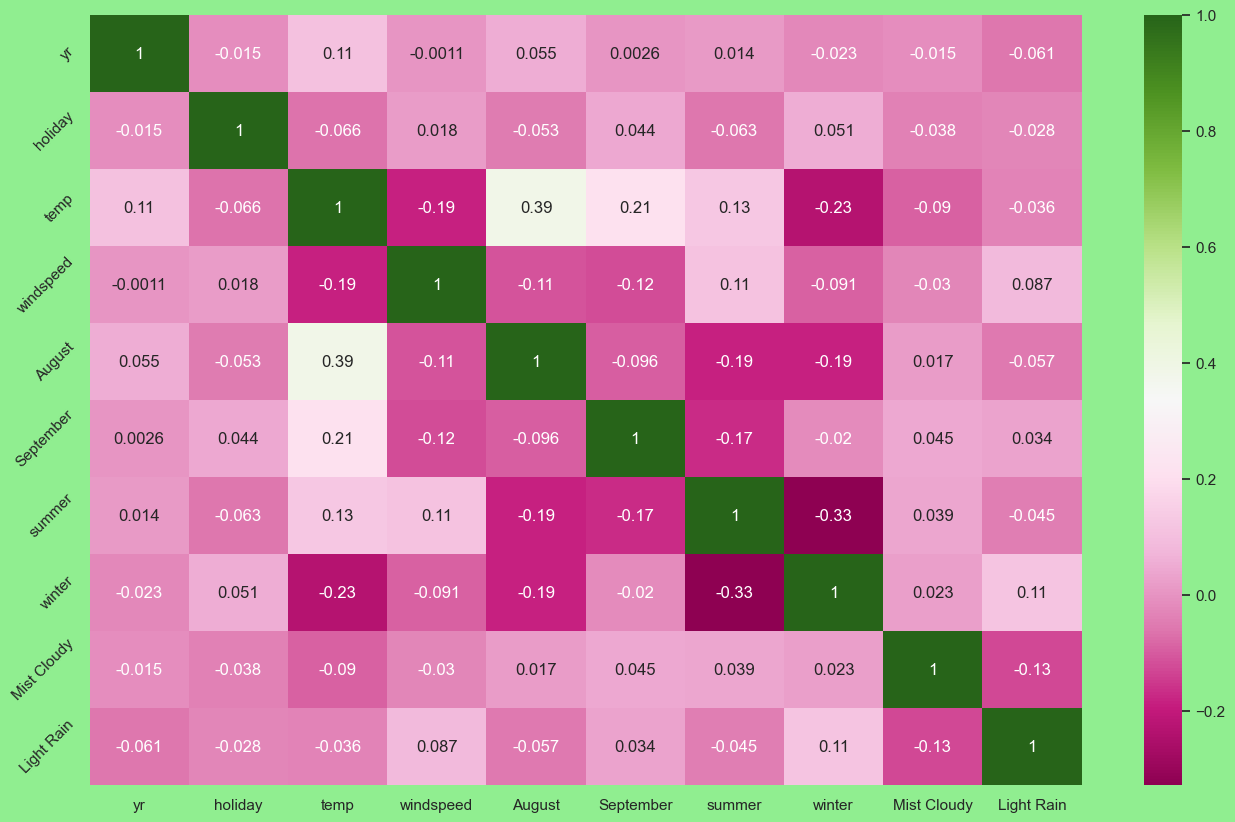

In [70]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new5.corr(), annot = True, cmap="PiYG")
plt.yticks(rotation=45)
plt.show()

# Step 7: Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_predict= lm5.predict(X_train_lm5)

In [72]:
#finding error terms
res=y - y_train_predict
res

653    0.143414
576    0.081824
426   -0.006584
728   -0.187149
482   -0.074677
         ...   
526    0.009656
578   -0.004024
53    -0.001374
350    0.061777
79    -0.072277
Length: 510, dtype: float64

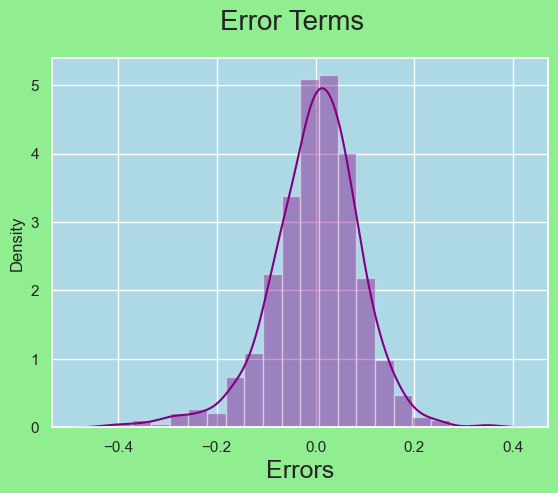

In [86]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y - y_train_predict), bins = 20,color = 'purple')
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                          # X-label
plt.show()

#### Note: Error terms are normally distributed with mean zero.

# Step 8: Making Predictions Using the Final Model


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Applying the scaling on the test sets

In [74]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [75]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,February,March,...,Thursday,Friday,Saturday,Sunday,summer,fall,winter,Mist Cloudy,Light Rain,Heavy Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.0
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.100457,0.054795,...,0.141553,0.132420,0.173516,0.0,0.264840,0.246575,0.232877,0.319635,0.027397,0.0
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.301297,0.228100,...,0.349389,0.339723,0.379560,0.0,0.442259,0.432005,0.423633,0.467403,0.163612,0.0
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('cnt')     #Dependent Variable
X_test = df_test                #Independent Variable

In [77]:
#Creating X_test_m6 to assign the columns after dropping all the insignificant variables

X_test_m6=X_test[X_train_new5.columns]

In [78]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test_m6)

In [79]:
y_test_predict= lm5.predict(X_test_m6)   

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

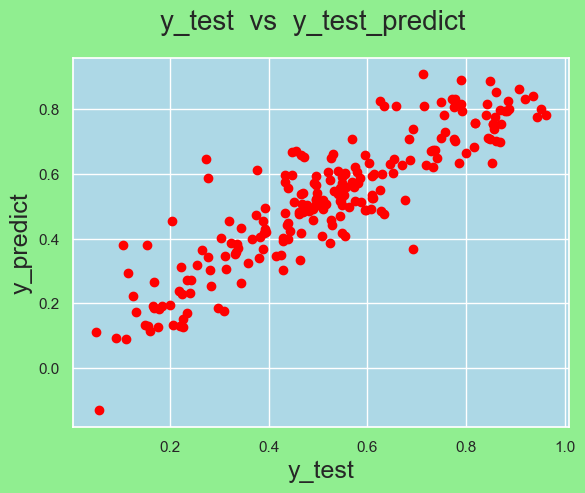

In [91]:
# Plotting y_test and y_test_predict to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_predict,color = "red")
fig.suptitle('y_test  vs  y_test_predict', fontsize = 20)          # Plot heading 
plt.xlabel('y_test', fontsize = 18)                              # x-label
plt.ylabel('y_predict',fontsize = 18)                             #y-label
plt.show()

##### Note: It follows a Linear Pttern which is good.

## R-squared score on the test set.

In [81]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_predict)

0.7931434526028905

# CONCLUSION:

#### Overall model is Decent.

- We can see that variable(temp ,yr, September , Winter) has high values and these days bike was in more demanding.

-  Variable (holiday ,windspeed and Mist Cloudy ) has very less value and these days the demand was very less .

   ### Equation For Best Fitted Line  


$ day = 0.233 \times yr - 0.097 \times holdiday + 0.517 \times temp - 0.149 \times windspeed + 0.054 \times August + 0.116   September + 0.100 \times summer + 0.138 \times winter -0.082 \times Mist Cloudy -0.282 \times Light Rain $